In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:

# df = pd.read_csv('city_temperature.csv')
# df = df.drop(['Region','Country','State'], axis=1)
# df.to_csv('update_city_temperature.csv', index=False)

dtypes = [('city', 'U50'),('month', float),('day', float),('year', float), ('temperature', float)]
City,Month,Day,Year,AvgTemperature = np.loadtxt('update_city_temperature.csv',delimiter=',', skiprows=1, dtype=dtypes, unpack=True)

Specify the Timeline of Study

In [3]:

start_date = datetime(2000, 7, 1)
end_date = datetime(2007, 12, 31)

print(start_date)
print(end_date)


2000-07-01 00:00:00
2007-12-31 00:00:00


Logic Used To Filter Dataset: 

In [4]:
day_logic = np.logical_and (np.array(Day)>= start_date.day, np.array(Day)  <= end_date.day)
month_logic = np.logical_and (np.array(Month)>= start_date.month, np.array(Month)  <= end_date.month)
year_logic = np.logical_and (np.array(Year)>= start_date.year, np.array(Year)  <= end_date.year)


same_month_logic = np.array(Month)== start_date.month

city_logic = np.array(City == 'Nairobi')

print(day_logic)

print(month_logic)

print(year_logic)


# new_temperature = AvgTemperature[(np.abs(AvgTemperature) < 90) & day_logic & month_logic & year_logic & city_logic]

# new_days = Day[(np.abs(AvgTemperature) < 90) & day_logic & month_logic & year_logic & city_logic]




[ True  True  True ...  True  True  True]
[False False False ...  True  True  True]
[False False False ... False False False]


Filter the Dataset 

In [5]:
new_days = Day[(np.abs(AvgTemperature) < 90) &  day_logic & month_logic & year_logic & same_month_logic & city_logic]

new_temperature = AvgTemperature[(np.abs(AvgTemperature) < 90)  & day_logic & month_logic & year_logic & same_month_logic & city_logic]

print(new_days)
print(new_temperature)

print(len(new_days))
print(len(new_temperature))






[ 1.  2.  3.  4.  5.  6.  8.  9. 10.  2. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.
 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.  1.
  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.  1.  2.  3.  4.  5.  6.  7.
  8. 10. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31.]
[59.6 59.4 60.8 60.9 62.6 64.1 63.5 59.6 65.5 67.7 67.5 71.2 74.1 64.5
 68.2 62.2 62.  66.6 62.6 67.6 62.4 64.9 56.1 54.3 65.1 65.  59.2 59.8
 59.3 60.4 58.9 59.2 61.2 62.  62.4 60.3 63.3 60.  58.8 59.6 66.5 63.9
 63.5 67.5 64.8 58.5 61.8 63.8 61.3 60.2 71.4 67.3 62.1 59.5 62.1 66.7
 64.4 64.7 65.5 63.3 62.6 61.6 61.  61.9 67.2 69.2 62.3 66.3 59.  67.2
 66.8 60.3 66.7 63.5 64.2 62.6 63.2 66.2 65.9 69.4 64.2 70.9 66.  64.5
 63.5 61.2 64.1 64.3 60.4 64.9 60.1 67.3 62.6 60.4 61.5 64.3 64.  63.1
 61.5 62.9 65.1 63.  64.2 64.1 65.  62.8 66.8 6

The Curve-Fit Function

In [6]:
def func(t,a,b,c):
    return a*np.cos(2*(np.pi)*t + b)+c


PLOT THE DATA SET

Text(0.5, 1.0, 'AVERAGE RAINFALL IN NAIROBI BETWEEN 2000 AND 2007 IN THE MONTH OF JULY')

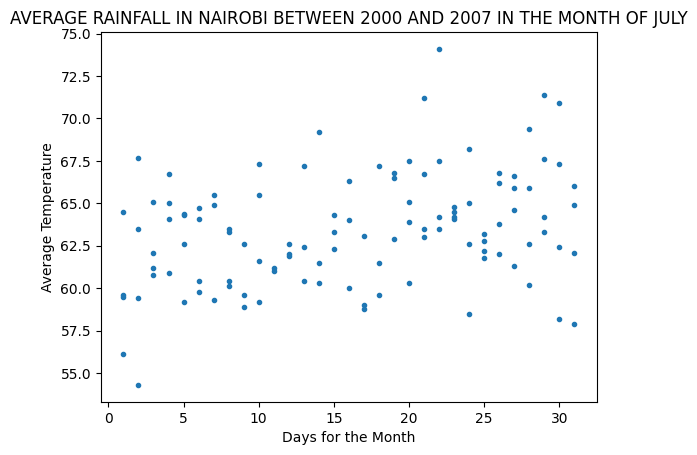

In [7]:
plt.plot(new_days,new_temperature,'.')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')
plt.title('AVERAGE RAINFALL IN NAIROBI BETWEEN 2000 AND 2007 IN THE MONTH OF JULY')

In [8]:
popt, pcov = curve_fit(func, new_days, new_temperature)


In [9]:
popt


array([-113.22492498,    0.72339987,  148.26975795])

In [10]:
pcov

array([[ 5.10213649e+31,  8.17994986e+19, -3.82435522e+31],
       [ 8.17994986e+19,  3.86867659e+08, -6.13135968e+19],
       [-3.82435522e+31, -6.13135968e+19,  2.86658204e+31]])

In [11]:
e = np.repeat(0.1,len(new_days))

Text(0, 0.5, 'Average Temperature')

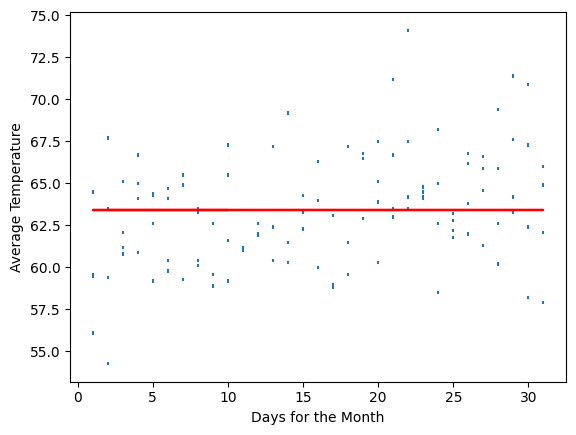

In [12]:
plt.errorbar(new_days,new_temperature,yerr=e, fmt="none")
plt.plot(new_days, func(new_days,*popt), 'r-')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')

Text(0, 0.5, 'Average Temperature')

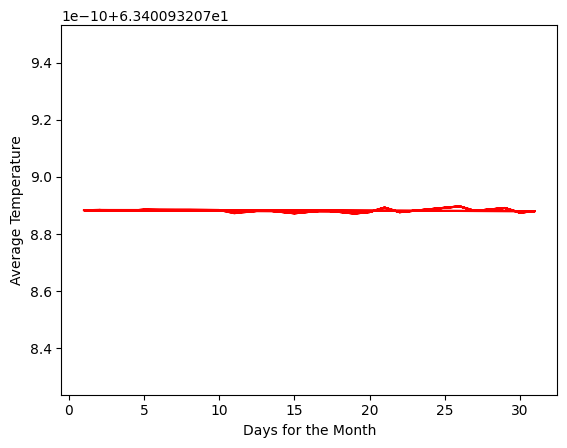

In [13]:
plt.plot(new_days, func(new_days, *popt), 'r-')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')